In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time

## Bundesliga

Below is an image of the end-of-season standings. Take a moment to scan over the table and then let's get into our analysis.

<img src="Tables/BundesligaTable.png">

In [4]:
#data cleaning
df = pd.read_csv("TopGoals/bundTopGoals.csv")
df = df.head(n=18)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(18):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
#print(df)
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(18):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

                  Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0         BayernMunich     34     88       61            261          620   
1     BorussiaDortmund     34     81       59            193          443   
2       1899Hoffenheim     34     70       47            226          578   
3      BayerLeverkusen     34     69       52            206          502   
4            RBLeipzig     34     63       40            180          482   
5         VfLWolfsburg     34     62       38            170          413   
6   EintrachtFrankfurt     34     60       42            155          398   
7         WerderBremen     34     58       37            179          461   
8    MönchengladbachB.     34     55       41            163          445   
9           FCAugsburg     34     51       32            166          435   
10           HerthaBSC     34     49       33            147          383   
11   FortunaDüsseldorf     34     49       36            169          412   

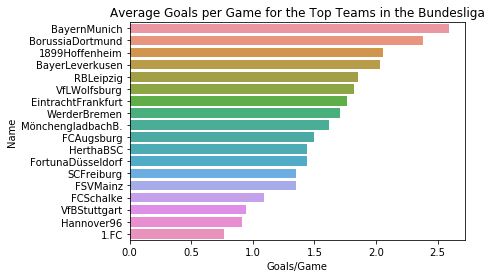

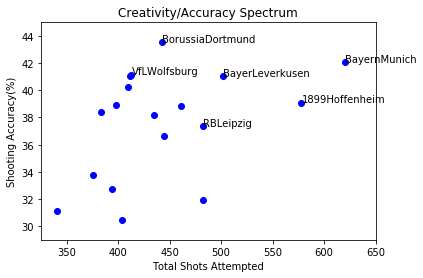

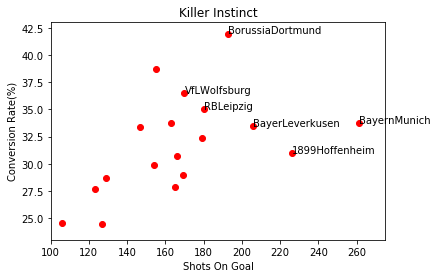

In [12]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in the Bundesliga')
plt.show()

plt.plot(df["Total Shots"], df["Shooting Accuracy(%)"], 'bo')
plt.axis([325, 650, 29, 45])
plt.title('Creativity/Accuracy Spectrum')
plt.xlabel("Total Shots Attempted")
plt.ylabel("Shooting Accuracy(%)")
for i in range(6):
    plt.annotate(df.at[i, 'Name'], xy=(df.at[i,'Total Shots'], df.at[i, 'Shooting Accuracy(%)']))
plt.show()

plt.plot(df["Shots on Goal"], df["Conversion Rate(%)"], 'ro')
plt.axis([100, 275, 23, 43])
plt.title('Killer Instinct')
plt.xlabel("Shots On Goal")
plt.ylabel("Conversion Rate(%)")
for i in range(6):
    plt.annotate(df.at[i, 'Name'], xy=(df.at[i,'Shots on Goal'], df.at[i, 'Conversion Rate(%)']))
plt.show()

### Analysis

From the first graphic, we can see that two teams (Bayern Munich and Borussia Dortmund) produce significantly more goals than the rest of the league. Over the course of a 34-game season, this amounts to both of these teams having at least 11 goals more than the next closest team. Comparing these goal-scoring charts with the end-of-season standings, we can see that they are closely related with higher scoring teams generally ending the season in better positions. Surprisingly there are some teams such as 1899 Hoffenheim and FC Ausburg that score enough goals to warrant higher league positions, however they also concede a very high number of goals leading to more ties and losses. Since the 2000/2001 season, there have only been five different teams to win the Bundesliga: Bayern Munich (13 times), Borussia Dortmund (3 times), VFL Wolfsburg, VFL Stuttgart, and Werder Bremen (each once). As we can tell, the Bundesliga has been dominated by Bayern Munich with Borussia Dortmund being the closest competition.

As such, from this point forward, we will only look at these two teams. However, I have included the rest of the teams in the graphics to give context about how prolific these teams are and to avoid misleading readers.

Looking at the second and third graphs, we can see that Bayern Munich take an absurd number of shots compared to the rest of the league. Coupled with the second highest shooting accuracy, second only to Borussia Dortmund, Bayern Munich also take the most shots on target. While Bayern Munich are not the most efficient team when it comes to converting their chances, they still rank above average and due to the large number of shots they take, it is only natural that their conversion rate will drop. 

Borussia Dortmund chases success in the Bundesliga in a starkly different manner. Rather than attempting to impose their dominance by taking a large number of shots, they make sure to take highly efficient shots. Borussia Dortmund tops both the shot accuracy and conversion rate statistics, which shows that while they may not take the most shots in the league, in fact they are quite average in that regard, the shots they take are from good positions and at the very least test the opponent. 

While this analysis does not consider club size and power, it is important to note here that Bayern Munich are a much more attractive and financially powerful team than any other in the Bundesliga and as such, can afford to sign better players. And although Bayern Munich have dominated the Bundesliga for the better part of the last two decades, there are signs that other teams such as Borussia Dortmund, have the tools and frameworks in place to achieve success in the near future.